# Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
original = pd.read_csv('salaries_cyber.csv')

In [3]:
original.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


Business Problem:
- Trying to see differences in salaries within Cyber Security field.

Feature Dictionary:

- work_year : Year the data was recorded
- experience_level : Job experience level (Entry-EN, Mid-MI, Senior-SE, Executive-EX)
- employment_type : Type of employment (Part-time-PT, full-time-FT, contract-CT, freelance-FL)
- job_title : Specific role
- salary : gross amount payed
- salary_currency : currency of salary (ISO 4217 currency code)
- salary_in_usd : salary in dollars
- employee_residence : Country of employee residence
- remote_ratio : Amount of remote work in a percentage (0% means no remote work, 50% means some remote work, 100% means job was fully remote)
- company_location : Country of company.
- company_size : Size of company (small, medium, or large)

# Data Prep

In [5]:
df = original.copy()

## Missing Values

In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No missing values

## Duplicates

In [7]:
df.duplicated().sum()

85

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

85 duplicate rows were removed

## Consistent/Correct Values


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1162 non-null   int64 
 1   experience_level    1162 non-null   object
 2   employment_type     1162 non-null   object
 3   job_title           1162 non-null   object
 4   salary              1162 non-null   int64 
 5   salary_currency     1162 non-null   object
 6   salary_in_usd       1162 non-null   int64 
 7   employee_residence  1162 non-null   object
 8   remote_ratio        1162 non-null   int64 
 9   company_location    1162 non-null   object
 10  company_size        1162 non-null   object
dtypes: int64(4), object(7)
memory usage: 108.9+ KB


In [11]:
df['work_year'].value_counts()

2022    504
2021    475
2020    183
Name: work_year, dtype: int64

- Data was collected in the last three years

In [12]:
df['experience_level'].value_counts()

SE    488
MI    392
EN    210
EX     72
Name: experience_level, dtype: int64

- SE = Senior-level | MI = Mid-level | EN = Entry-Level | EX = Executive_level

In [13]:
df['employment_type'].value_counts()

FT    1140
CT      11
PT       8
FL       3
Name: employment_type, dtype: int64

- FT = Full-time | CT = Contract | PT = Part-time | FL = Freelance

In [14]:
df['job_title'].value_counts()

Security Engineer                          144
Cyber Security Analyst                     130
Penetration Tester                          68
Cyber Security Engineer                     63
Information Security Manager                62
                                          ... 
Principal Application Security Engineer      1
Application Security Specialist              1
Information Security Compliance Analyst      1
Application Security Architect               1
Concierge Security Engineer                  1
Name: job_title, Length: 87, dtype: int64

In [15]:
df['salary_currency'].value_counts()

USD    849
EUR    127
GBP     56
CAD     39
INR     23
AUD     18
BRL     12
CHF      9
NZD      5
PLN      4
DKK      4
ZAR      3
SEK      3
ILS      2
SGD      2
NOK      1
IDR      1
MXN      1
HUF      1
TWD      1
RUB      1
Name: salary_currency, dtype: int64

Verified all currency codes:
- USD = US Dollar
- EUR = Euro
- GBP = British Pound, Sterling
- CAD = Canada Dollar
- INR = India Rupee
- AUD = Australian Dollar
- BRL = Brazilian Real
- CHF = Frank
- NZD = New Zealand Dollar
- PLN = Poland Zloty
- DKK = Danish Krone
- ZAR = South Africa Rand
- SEK = Sweden Krona
- ILS = Israel Shekel
- SGD = Singapore Dollar
- NOK = Norway Kroner
- IDR = Indonesia Rupiah
- MXN = Mexican Peso
- HUF = Hungary Forint
- TWD = Taiwan Dollar
- RUB = Russian Ruble

In [16]:
df['employee_residence'].value_counts()

US    781
GB     57
CA     49
DE     35
IN     30
FR     22
AU     21
NL     13
BR     13
CH     12
ES     12
PT     11
IT      8
IE      6
GR      6
PL      5
NZ      5
SE      4
SI      4
RO      4
AR      4
DK      4
ZA      3
AF      3
BE      3
AE      3
SG      3
BG      2
AT      2
EE      2
RU      2
JP      2
HU      2
IL      2
TW      2
DZ      2
PK      2
IR      1
BW      1
LT      1
SA      1
VN      1
EG      1
LU      1
CL      1
GH      1
AZ      1
MX      1
KE      1
KG      1
ID      1
CZ      1
NO      1
NG      1
HR      1
ET      1
CR      1
TR      1
Name: employee_residence, dtype: int64

In [17]:
df['remote_ratio'].value_counts()

100    706
50     242
0      214
Name: remote_ratio, dtype: int64

In [18]:
df['company_location'].value_counts()

US    804
GB     57
CA     45
DE     33
IN     23
AU     20
FR     19
CH     14
NL     13
BR     12
ES     11
IT      8
PT      8
DK      6
PL      5
GR      5
NZ      5
IE      5
RO      4
RU      4
SI      4
SE      4
SG      4
BE      3
AR      3
ZA      3
NO      3
IL      3
AT      2
EE      2
AF      2
HU      2
JP      2
AE      2
DZ      2
PK      1
BW      1
SA      1
VN      1
TW      1
EG      1
LU      1
UM      1
CL      1
AZ      1
MX      1
RS      1
KE      1
AQ      1
ID      1
CZ      1
AX      1
HR      1
ET      1
TR      1
Name: company_location, dtype: int64

In [19]:
df['company_size'].value_counts()

L    756
M    317
S     89
Name: company_size, dtype: int64

# Presentation

All my presentations will be separated by year but we will look at the highest and lowest salary for each following feature:

- Job Title
- Company Location
-

In [20]:
# I will Rename the Column Names for Presentation Purposes
df1 = df.copy()

df1 = df1.rename(columns={"work_year":"Work Year", "experience_level":"Experience Level",
"employment_type":"Employment Type", "job_title":"Job Title", "salary":"Salary",
"salary_currency":"Salary Currency", "salary_in_usd":"Salary In USD", 
"employee_residence":"Employee Residence", "remote_ratio":"Remote Ratio",
"company_location":"Company Location", "company_size":"Company Size"})

In [21]:
# I will create 3 dataframes for each unique year that the data was collected.
df1["Work Year"].value_counts()

2022    504
2021    475
2020    183
Name: Work Year, dtype: int64

In [22]:
# Different dataframes for each year
df_2022 = df1.loc[df1["Work Year"] == 2022].copy()
df_2021 = df1.loc[df1["Work Year"] == 2021].copy()
df_2020 = df1.loc[df1["Work Year"] == 2020].copy()

In [23]:
# Sorted by Salary in USD from lowest to highest
df_2022 = df_2022.sort_values(by="Salary In USD")
df_2021 = df_2021.sort_values(by="Salary In USD")
df_2020 = df_2020.sort_values(by="Salary In USD")

In [109]:
sir = 'SIR'
sir.lower()

'sir'

## Class for Presentation

Next tasks, find a way to relabel the legend to have the exact salary instead of job title

In [295]:
class Salaries:
    def __init__(self, data):
        # Entire DataFrame
        self.data=data
        # DataFrame Features
        self.job_title = self.data[["Job Title"]]
        self.salary_in_usd = self.data[["Salary In USD"]]
        self.work_year = self.data[["Work Year"]]

    def salary(self, type_, feature, range_):
        price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')

        fig, ax = plt.subplots(figsize= (7,5))
        sns.set_style("darkgrid")
        
        if type_.lower() == 'top':
            sns.scatterplot(data=self.data, y=self.data[feature].tail(range_), 
                            x=self.data['Salary In USD'], s=200, marker="+", 
                            color=".2")
            plt.xlim(left=0, right=(self.salary_in_usd.tail(range_).max().values + 100000))
            plt.suptitle("Highest Salaries for Year", fontsize=20)
        elif type_.lower() == 'low':
            sns.scatterplot(data=self.data, y=self.data[feature].head(range_),
                            x=self.data['Salary In USD'], s=200, marker="|",
                            color=".2")
            plt.xlim(left=0, right=(self.salary_in_usd.head(range_).max().values + 10000))
            plt.suptitle(f"Lowest Salaries for Year", fontsize=20)
        
        plt.ylabel(feature, fontsize=15)
        plt.xticks(rotation=-80)
        plt.xlabel(self.salary_in_usd.columns, fontsize=15)
        ax.xaxis.set_major_formatter(price_fmt)
        
        plt.title(f"{str(self.work_year.values[1])[1:5]}"
                  , fontsize=17);

In [296]:
class_df2022 = Salaries(df_2022)
class_df2021 = Salaries(df_2021)
class_df2020 = Salaries(df_2020)

In [142]:
class_df2022.data.values[0]

array([2022, 'EN', 'FT', 'Penetration Tester', 2000, 'USD', 2000, 'RO',
       50, 'RO', 'M'], dtype=object)

In [141]:
print(f"""For Year :: {class_df2022.data.values[0][0]}""")

For Year :: 2022


## Top Salaries by Job Title

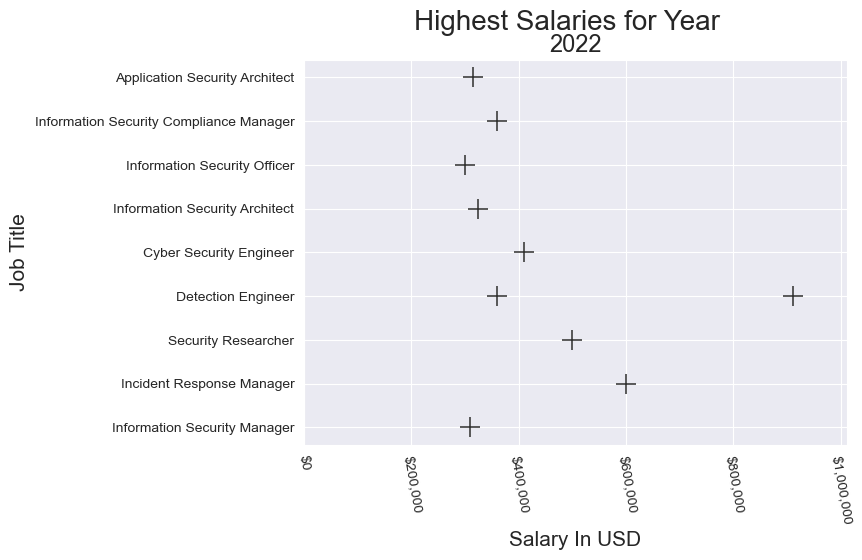

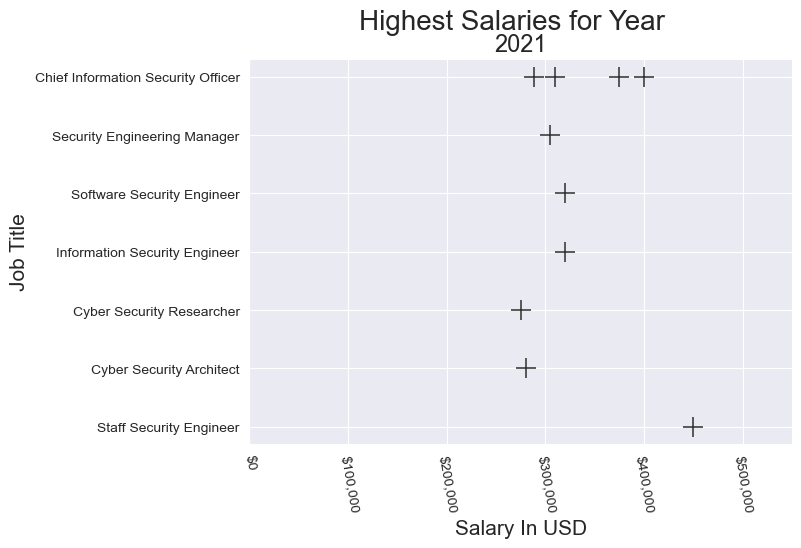

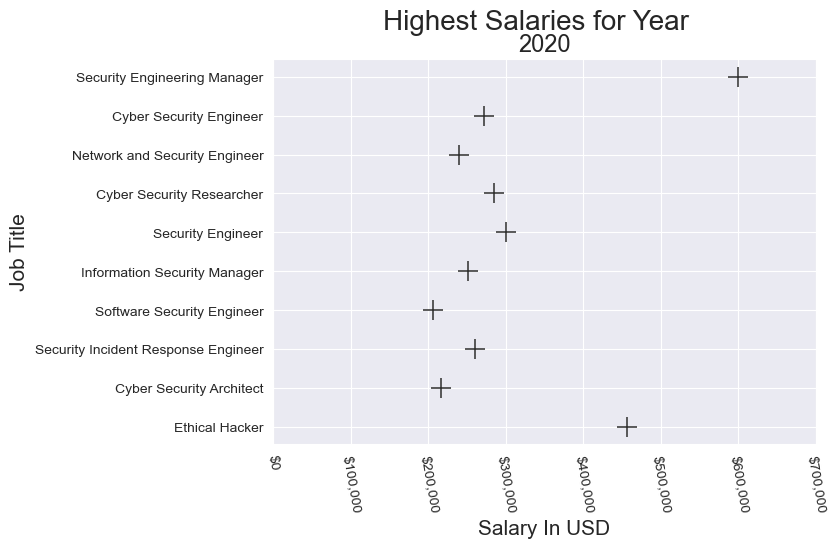

In [297]:
class_df2022.salary('Top', 'Job Title', 10)
class_df2021.salary('TOP', 'Job Title', 10)
class_df2020.salary('tOP', 'Job Title', 10)

**Top 10  Highest Salaries Analysis by Year:**

2020: The highest paying job was during this year was "Security Engineering Manager" with a ~$600k a year salary.
> **Security Engineering Manager**: Initiates the conceptual design, technical specifications and oversees implementation of all new security systems/projects.

After this job there is a large drop to ~450k as an ethical hacker and then the rest of the jobs are between 200k to 300K. There is a very large difference between the highest paying job and most other jobs in the field.

2021: The highest paying job for this year was a "Staff Security Engineer" at ~$450k a year.
>**Security Engineer, or Security Administrator**: handles the digital security for their company or clients.

Not sure what happened to the salaries for security engineering managers if it simply was not accounted for this year or something happened to the position this year.

2022: The highest paying job for this year was between "Detection Engineer" that reached about ~$900k dollars.

>**Detection engineering**: is the process of identifying threats before they can do significant damage.

From 2020 to 2022 we see a sudden shift in desire from someone who can organize the cyber security workers in a business in 2020 to someone who is capable to respond at a high level of expertise to either prevent, or quickly respond to, security issues.

2023 and beyond: For anyone seeking to make the highest salary possible in the cyber security field will most likely need to focus more on field expertise rather than the business/governance side of cyber security as the need to either prevent or quickly and accurately respond will only increase as IoT and other technologies begin to control more and more aspects of company and personal life based on the data presented here.

## Lowest Salaries by Job Title

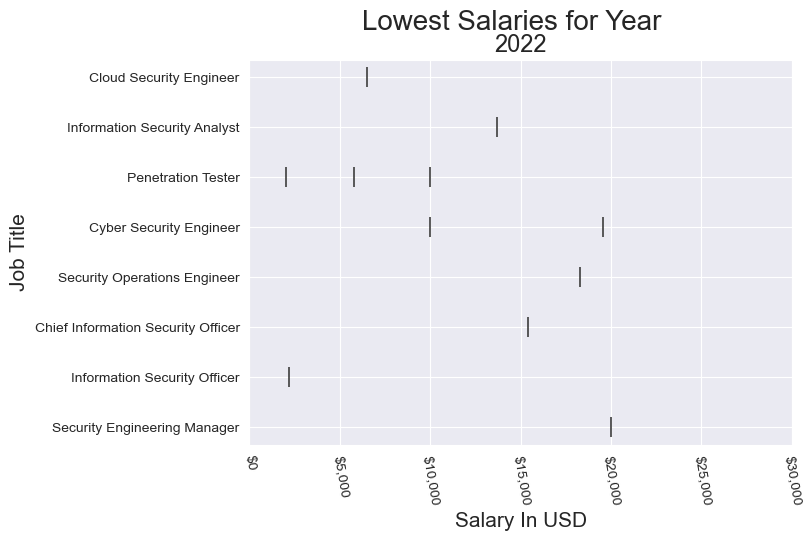

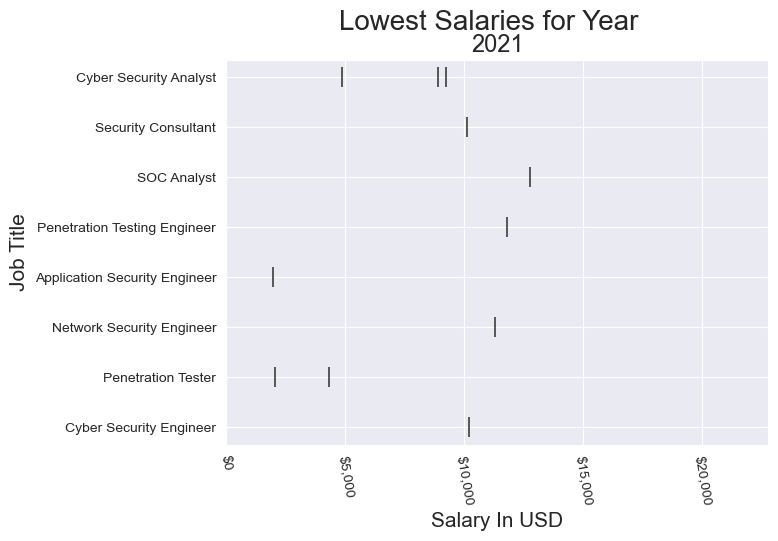

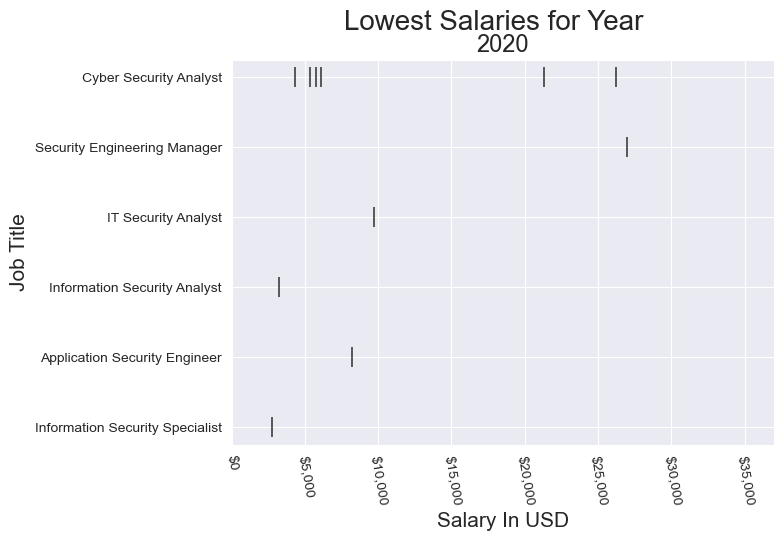

In [249]:
class_df2022.salary('low', 'Job Title', 11)
class_df2021.salary('LOW', 'Job Title', 11)
class_df2020.salary('loW', 'Job Title', 11)

**Top 10 Lowest Salaries Analysis by Year**

2020: The lowest paying job is information security specialist.

> **Information Security Specialist**: Entry level position that completes daily security tasks such as checking server and firewall logs, updating and maintaining virus scans, among other things.


2021: The lowest paying job is application security engineer.

> **Application Security Engineer**: Charged with applying security systems and software such as installing firewalls or any other security systems into the network. As well as work with other professionals to solve security-related problems.


2022: The lowest paying job is penetration tester.

> **Penetration Tester**: Aka an ethical hacker, they attempt to breach a companies network and find vulnerabilities.

These are interesting numbers to see because these jobs within the US pay much more than was recorded when the data was collected. For greater understanding of these numbers I will cross reference location of company and residence of employee in the following visuals.

Using these numbers for lowest salary, it is hard to see where someone starting in the field should go for and expect as is. Seeing where the top paying jobs are and where the low paying jobs are can help moving forward. 

## Top and Lowest Salaries by Company Location

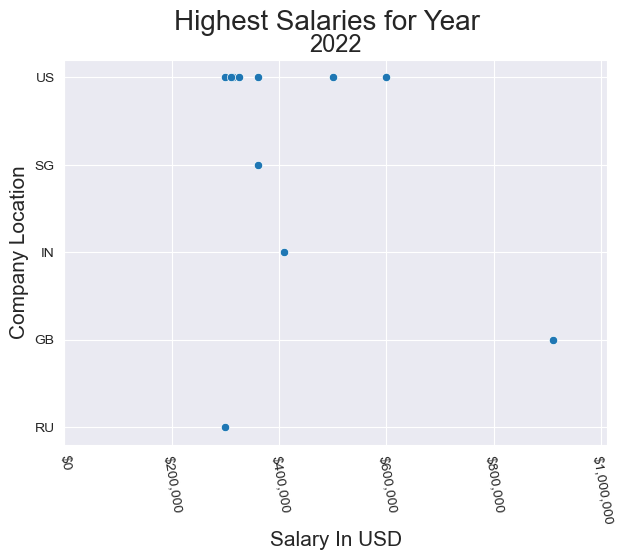

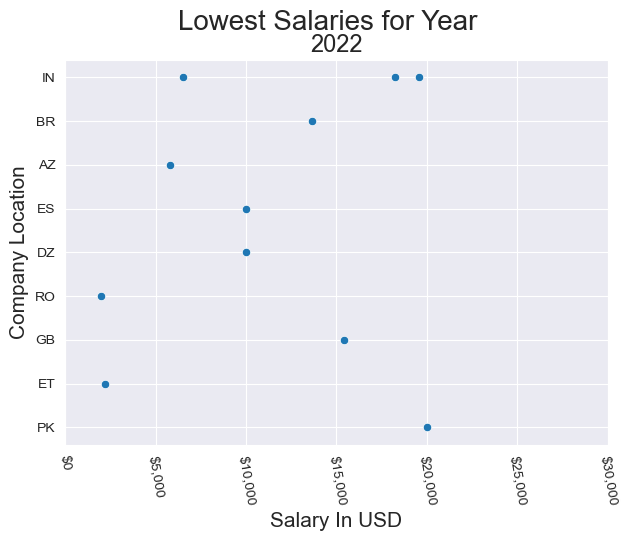

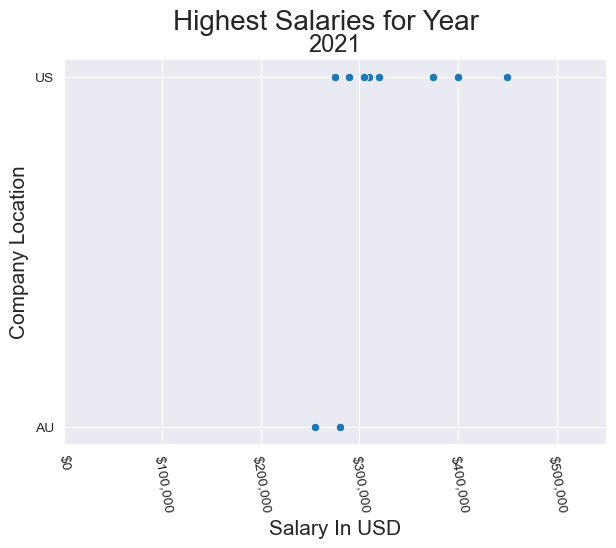

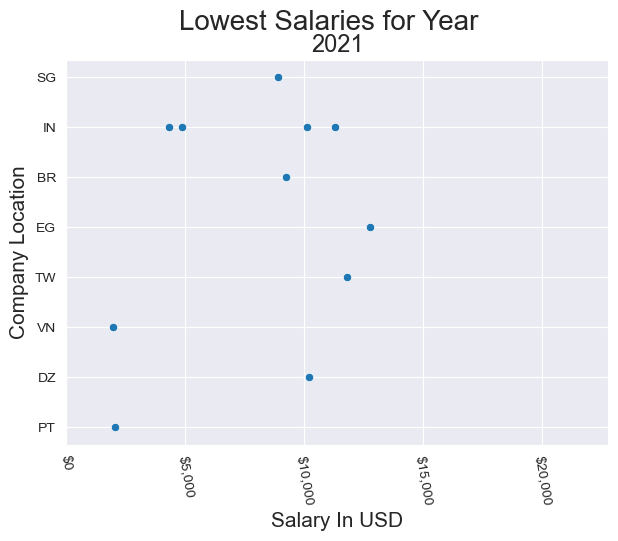

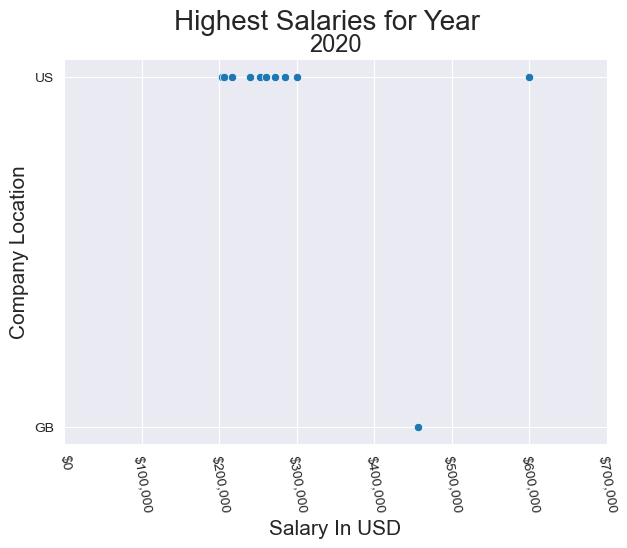

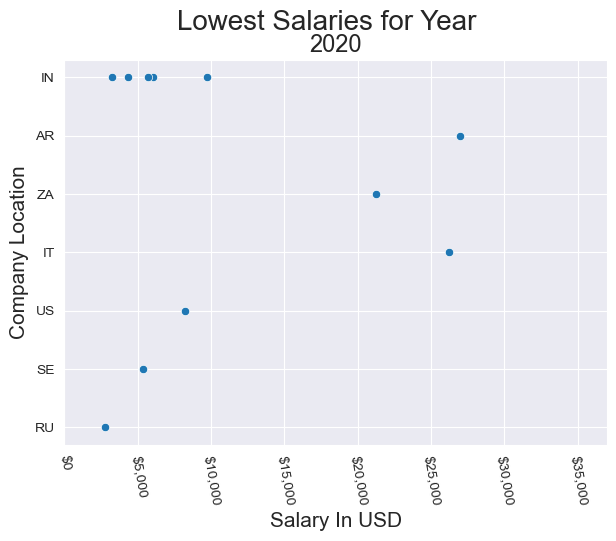

In [205]:
class_df2022.salary('top', 'Company Location', 11)
class_df2022.salary('low', 'Company Location', 11)

class_df2021.salary('top', 'Company Location', 11)
class_df2021.salary('low', 'Company Location', 11)

class_df2020.salary('top', 'Company Location', 11)
class_df2020.salary('low', 'Company Location', 11)